# Tutorial week 4 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jacky-lim-data-analyst/mini_project_cv/blob/main/w4_tutorial.ipynb)

# Learning outcomes
1. Gentle introduction to what is computer vision
2. Review: Important concepts of image stored as Numpy array
3. Image cropping
4. Different types of color models: HSV, RGB and CIELAB
    * Split and merge image channels
    * Manipulate the image channels
5. Point operators.

# What is digital image processing / computer vision?

As humans, we perceive the 3D structure of the world around us with ease. For example, looking at a framed group portrait, you can easily count and name all the people in the picture and even guess at their emotions from their facial expressions.

Perceptual psychologists have spent decades trying to comprehend how visual system works and optical illusions have been discovered to solve the puzzle, a complete solution is still far beyond our reach. 

Computer vision / digital image processing is being utilized in diverse of real world applications:
- Optical character recognition (OCR): reading handwritten postal codes on letters and automatic plate recognition.

  ![OCR](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Portable_scanner_and_OCR_%28video%29.webm/1200px--Portable_scanner_and_OCR_%28video%29.webm.jpg "Optical character recognition")
- Medical imaging: registering pre-operative and intra-operative imagery or performing long term studies of internal organ.

  ![CT scan](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRta2V0mlQ-4oVHOUfyhRGpyPm64T4smphtzg&s "CT scans")
- Self-driving vehicles.

  ![Autonomous driving](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdDERoAxq7k7ujdso6ghyI2hm6yn2cK9pJAQ&s "autonomous vehicle")
- Surveillance: monitoring for intruders, analyzing highway traffic and monitoring pools for drowning victims.

  ![surveillance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP9mr_ytNAapxlWafQLG5AcZZKVZ2wgPheFQ&s "surveillance system")
- Fingerprint recognition and biometrics: automatic access authentication as well as forensic applications.

  ![biometrics](https://www.nec.co.nz/wp-content/uploads/2018/02/Close-up-of-womans-left-eye-showing-iris-recogntion-points-market.jpg "iris recognition")

# Setup

In [1]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import display_images

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Review: Representation of image as Numpy array
An image is a multidimensional array; it has columns and rows of pixels, and each pixel has a value. For different kinds of image data, the pixel value may be formatted in different ways. We can create a $4\times 4$ square black image from scratch by simply creating a 2D NumPy array as shown in the following cells.

Create a custom array 

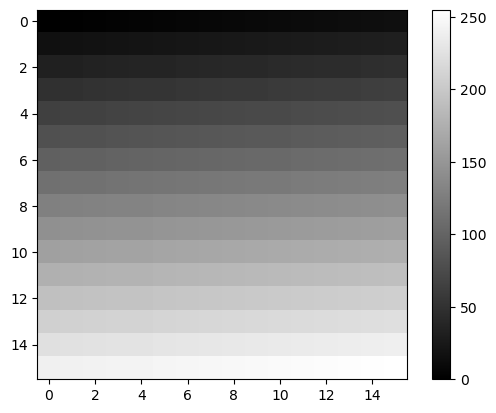

In [2]:
arr = np.arange(0, 256, dtype="uint8").reshape((16, 16))

plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()

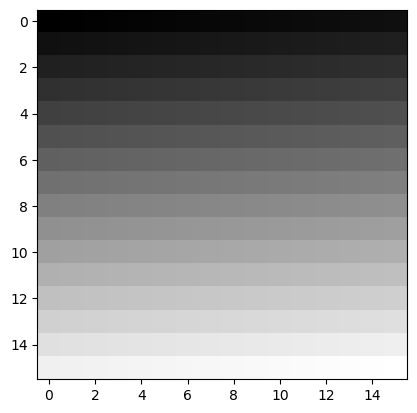

In [3]:
arr_3d = cv.cvtColor(arr, cv.COLOR_GRAY2RGB)

plt.imshow(arr_3d)
plt.show()

In [4]:
print(arr.shape)
print(arr_3d.shape) # change of dimension
# Broadcasting 0 to all the channel

(16, 16)
(16, 16, 3)


In [5]:
# First row and last column
print(arr[0, -1])
print(arr_3d[0, -1, :])

15
[15 15 15]


In [6]:
# first row and last column 
print(arr[0, -1])
print(arr_3d[0, -1, :])
# Get the index to broadcast to all the channel (15)

15
[15 15 15]


Here, each pixel is represented by a single 8-bit integer, which means that the values of each pixel are in 0-255 range, where 0 is black, 255 is white and the in-between values are shades of gray. This is a **grayscale** image. You can use `cv.cvtColor()` to convert the images from one color space to another. We will discuss about image color spaces later.

In [9]:
img = np.zeros((4, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [10]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [11]:
print(img_bgr.shape)

(4, 4, 3)


# Array Slicing (Important for image cropping)

In [12]:
# Slicing -> Column Slicing from 2 to 5 + Row Slicing from 2 to 5
arr[2:5, 2:5]

array([[34, 35, 36],
       [50, 51, 52],
       [66, 67, 68]], dtype=uint8)

**Exercise**
---
1. Create a $200 \times 200$ white image and display it. 
2. Leverage your image processing skills to create a simple wallpaper design as shown in the following image:

![pattern](img_embed/exercise_w4.jpg "Pattern")

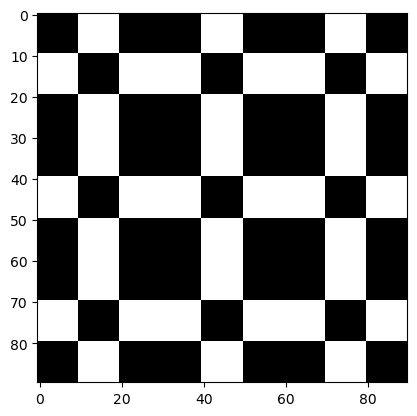

In [13]:
# Create a patch 
patch = np.zeros((30, 30), dtype = np.uint8)

# Start from 0 to 10(Can be columns or rows), 10 to 20
patch[:10, 10:20] = 255
patch[10:20, :10] = 255
patch[10:20, 20:] = 255
patch[20:, 10:20] = 255

# replicate the patch to become 3x3 (multiple itself by 3) -> 3 times across the width and height
img = np.tile(patch, (3, 3))

plt.imshow(img, cmap = "grey", vmin = 0, vmax = 255)
plt.show()

In [14]:
img = cv.imread("images/flower.jfif")

from utils import display_image

display_image("image", img)

# Task to do - Cut out the region to get the flower
# 3 Ways to do it

### 3 ways to crop a region from image:
1. use mouse click callback function
2. use `cv.selectROI()`
3. use external software like Paint

Retrieve the coordinates of bounding box that surrounds the object. 

#### How to define the bounding box?
1. $(x1, y1, x2, y2)$
2. $(x,y,w,h)$

In [15]:
# 1st way
img = cv.imread("images/flower.jfif")

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN: #Left click on mouse
        print(x, ",", y)
        cv.imshow("image", img)
        
cv.imshow("image", img)
cv.setMouseCallback("image",mouse)
cv.waitKey(0)
cv.destroyAllWindows()

71 , 34


In [16]:
flower = img[40:125, 90:175]

display_image("flower", flower)

In [17]:
# 2nd way
r = cv.selectROI("img", img)
print(r)

cv.destroyAllWindows()

(64, 28, 141, 111)


The output is in $(x,y,w,h)$

In [18]:
x, y, w, h = r

flower = img[y: y+h, x: x+w]

display_image("flower", flower)

# Patching of an image

In [19]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

# user defined parameters
num_vertical_patches = 2
num_horizontal_patches = 3

# grab the width and height of img
height, width = img.shape[:2]

#number of pixels per patch
M, N = height // num_vertical_patches, width // num_horizontal_patches

# M = how many pixel you take 
for y in range(0, height, M):
    for x in range(0, width, N):
        x1 = x + N
        y1 = y + M
        
        if x1 >= width and y1 >= height:
            x1 = width -1 
            y1 = height -1
            cv.rectangle(img_copy, (x, y), (1, y1), (0, 255, 0), 1)
            
        elif x1 >= width:
            x1 = width -1
            cv.rectangle(img_copy, (x, y), (1, y1), (0, 255, 0), 1)
            
        elif y1 >= height:
            y1 = height -1
            cv.rectangle(img_copy, (x, y), (1, y1), (0, 255, 0), 1)
            
        else:
            cv.rectangle(img_copy, (x, y), (1, y1), (0, 255, 0), 1)
            
display_image("patch", img_copy)

# Color Space 
- RGB
- HSV (Emphasis)
- CIELAB

# Manipulate channels independently

In [20]:
# It will be nice to split the channels
# Work on the hue channel in HSV
img = cv.imread("images/car.jpg")

# change BGR to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split Channels
h, s, v = cv.split(img_hsv)

# Change h channel to [0 to 179]
h_new = np.zeros_like(h) + 77 # all the entry + with 77
h_new = np.uint8(h_new)

# merge channels
transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

from utils import display_images
display_images([img, transform_display], ("original", "hue=77"))
# 77 turns out to be green (colors)
# red -> 0 to 30

# display_images([img, transform_display], ("original",f"hue={new_hue}"))

In [21]:
# saturation
h, s, v = cv.split(img_hsv)

# change the s channel to [0 - 255]
new_saturation = 255
s_new = np.zeros_like(s) + new_saturation
s_new = s_new.astype(np.uint8)

# merge channels
transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", f"saturation={new_saturation}"))

# Point Operator
Mathematical arithmetic operation:
$$g(x) = \alpha f(x) + \beta$$

In [22]:
np.uint8([-1, 0, 255, 256, 257])

## Underflow and overflow (very normal)
# After converting to uint8
# So it basically work like a clock (everything after 255 will be returns back to 0)

C:\Users\Ang Qiao Yi\AppData\Local\Temp\ipykernel_5736\4124387307.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.uint8([-1, 0, 255, 256, 257])
C:\Users\Ang Qiao Yi\AppData\Local\Temp\ipykernel_5736\4124387307.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.uint8([-1, 0, 255, 256, 257])
C:\Users\Ang Qiao Yi\AppData\Local\Temp\ipykernel_5736\4124387307.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the

array([255,   0, 255,   0,   1], dtype=uint8)

In [23]:
def point_op(img, alpha, beta):
    """ Point operation (linear transformation)
    Arguments:
    ---
    img: Numpy array
    alpha: coefficient
    beta: bias

    Returns:
    ---
    linearly transformed image (uint8) """
    # change to float32
    img = img.astype("float32")
    # operations 
    res = alpha * img + beta
    # clip
    res = np.clip(res, 0, 255) #everything will be transcript back to 255
    return np.uint8(res)

# Important to keep this function in your files

In [24]:
img = cv.imread("images/camera.jpg")
alpha = 1.5 # lower this to becmoe darker brightness
beta = 0
res = point_op(img, alpha, beta)

display_images([img, res], ("original", f"alpha={alpha},beta={beta}"))

## Access elements in an array

In [27]:
img = cv.imread('images/lena.jfif')

%timeit a = img[100, 30, 0]
%timeit b = img.item(100, 30, 0)

300 ns ± 35.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
274 ns ± 36.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# Cropping an image
Why crop an image? 
1. Remove all unwanted objects or areas from an image
2. Improve the overall composition of the image. Visit this [link](https://expertphotography.com/improve-your-composition-the-rule-of-thirds/) on how separating image into grids and putting the subject of interest on the intersection point could create a more compositional pleasing photo. This is known as of rule of thirds.
3. One of the image augmentation techniques in deep learning model training.

The operations are literally the same as extracting ROI.

## Divide an image into smaller patches using cropping
One practical application of cropping in OpenCV is to divide an image into smaller patches. The following example shows how to split image into a $2 \times 3$ grid.

In [34]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

height, width = img.shape[:2]
num_vertical_patches = 2
num_horizontal_patches = 3

# M and N are basically number of pixels per patch
M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

x1, y1 = 0, 0

for y in range(0, height, M):
    for x in range(0, width, N):
        
        y1 = y + M
        x1 = x + N
        
        if x1>=width and y1>=height:
            x1 = width-1
            y1 = height-1
            tile = img[y:height, x:width]
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            cv.imshow('tile', tile)
            
        elif y1>=height:
            y1 = height-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        elif x1>=width:
            x1 = width-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise
1. Divide the image into 4 equal regions. Swap their positions as shown below:

   ![dog_swap](img_embed/crop_swap.PNG "dog")
2. Cover the face of lena with white mask as shown as the following:

   ![lena_mask](img_embed/lena_mask.PNG "lena mask")

3. Extract the region of interest (flower) from the 'flower.jfif'.

In [42]:
# Exercise 1
img = cv.imread("images/dog.jfif")

height, width, channels = img.shape

w_half = width // 2
h_half = height // 2

# All the part that had been divided should be
top_left_part = img[:h_half, :w_half]
top_right_part = img[:h_half, w_half:]
bot_left_part = img[h_half:, :w_half]
bot_right_part = img[h_half:, w_half:]

# Swapping operations
swapped_top_left = bot_right_part
swapped_top_right = bot_left_part
swapped_bot_left = top_right_part
swapped_bot_right = top_left_part

# Combine the swapped part back into a single image
top_half = np.hstack((swapped_top_left, swapped_top_right)) #Horizontal Top Stack
bottom_half = np.hstack((swapped_bot_left, swapped_bot_right)) # Horizontal Bottom Stack
swapped_completed_img = np.vstack((top_half, bottom_half)) # Vertical top and bottom stack

cv.imshow("Swapped Image", swapped_completed_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [45]:
# Exercise 2
img = cv.imread("images/lena.jfif")

# Define the size of the white square
square_size = 120

def mouse(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        top_left = (x - square_size // 2, y - square_size // 2)
        bottom_right = (x + square_size // 2, y + square_size // 2)
        
        cv.rectangle(img, top_left, bottom_right, (255, 255, 255), -1)
        cv.imshow("Lena with Mask", img)

# Display the image and set the mouse callback
cv.imshow("Lena with Mask", img)
cv.setMouseCallback("Lena with Mask", mouse)

cv.waitKey(0)
cv.destroyAllWindows()

In [46]:
# Question 3
from utils import display_image

flower_img = cv.imread("images/flower.jfif")

r = cv.selectROI("flower img", flower_img)

print(r)

cv.destroyAllWindows()

x, y, w, h = r

flower = flower_img[y:y+h, x:x+w] 

display_image("cropped flower", flower)

(76, 49, 105, 69)


# Color space / color model
In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of 3 components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white. RGB is considered an "additive" color space, and colors can be imagined as being produced from shining quantities of red, blue and green light onto a black background.

There are so many color spaces because different color spaces are useful for different purposes. We will typically work with 3 kinds of color models: blue-green-red (BGR), grayscale and hue-saturation-value (HSV).

In reality, color is a continuous phenomenon, meaning that there are an infinite number of colors. Color spaces, however represent color through discrete structures (a fixed number of whole number integer values), which is acceptable since the human eye and perception are also limited. 

## RGB color space
It is an additive colorspace where colors are obtained by a linear combination of Red, Green and Blue values. 

There are some inherent problems asociated with RGB colorspace:
- significant perceptual non-uniformity.
- mixing of chrominance and luminance data.

## LAB color space
3 components:
- L: lightness (intensity).
- A: color component ranging from green to red.
- B: color component ranging from blue to yellow.

The L component is independent of color information and encodes brightness only. 

## YCrCb color space
Like LAB colorspace, the luminance and chrominances are separated into different channels. Y is used to represent luminance (or luma), Cb represents blue-difference, and Cr represents red-difference.

## HSV color space
1. Hue is the color attribute that describes pure color. 
2. Saturation is the quantity that reflect the degree to which pure color is diluted by white light.
3. Value or intensity is brightness.

![hsv cylindrical spectrum](img_embed/hsv_cylindrical.jfif "HSV")

> **Important** 🗝️
>
> In OpenCV, hue range is $[0,179]$, saturation range is $[0,255]$, and value range is $[0,255]$. Different software use different scales. So if you are comparing OpenCV values with them, you need to **normalize these ranges**. 
> The important takeaway is: *Lighting condition can mean the difference between success and failure of your computer vision algorithm.* Thus, color space which could factor out luminance into different channel should be the choice.

## Conversion of color spaces
The conversion of color spaces in OpenCV can be done with ease using the `cv.cvtColor(img, ColorConversionCode)`. There are more than 300 types of color conversion modes in OpenCV. You can check them out on the [official documentation](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html). This [link](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html) is useful if you wish to know more about the mathematical details of color space conversion in OpenCV.

## Splitting and merging Image channels
The B, G and R channels can be split into their individual planes when needed. Then the individual channels can be merged back together to form BGR image again. The splitting and merging operations can be attained by the following functions respectively:
* `cv.split(m)`, where m is a multi-channel array.
* `cv.merge(mv)`, where mv is a tuple / list of matrices to be merged; all the matrices in mv must have the same size and the same depth (precision of each pixel).

In [30]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

print(f"Are the two images the same? {np.equal(img, img_merge).all()}")

Are the two images the same? True


## Manipulate image channels

### HSV color channels

#### Hue channel

In [31]:
# set the hue to a certain value
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
h_new = np.zeros_like(h) + 30
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "hue=30"))

In [32]:
# change the saturation 
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
s_new = np.zeros_like(s) + 255
s_new = np.uint8(s_new)

transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "saturation decrease"))

### Exercise
1. Display the blue, green and red channel of the **lena** image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

![exercise_fig](img_embed/diff_color_channels.jpg "color dogs")

In [51]:
# Exercise 1
img = cv.imread("images/lena.jfif")
img_copy = img.copy()

colors = ("blue", "green", "red")
channels = cv.split(img)

for i, channel in enumerate(channels):
    new_channel = np.zeros_like(channel) + 255
    new_channel = np.uint8(new_channel)
    img_copy = img.copy()
    img_copy[...,i] = new_channel
    cv.imshow(colors[i], img_copy)

cv.waitKey(0)
cv.destroyAllWindows()

In [33]:
# Exercise 2
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

colors = ("blue", "green", "red")
channels = cv.split(img)

for i, channel in enumerate(channels):
    new_channel = np.zeros_like(channel) + 255
    new_channel = np.uint8(new_channel)
    img_copy = img.copy()
    img_copy[...,i] = new_channel
    cv.imshow(colors[i], img_copy)

cv.waitKey(0)
cv.destroyAllWindows()

# Point operator 

## Point operator
It is merely mathematical operations on each pixel value of an image. The formula is as follows:
$$f(x, y) = \alpha f(x, y) + \beta$$

In [11]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

### Enhance the contrast and brighten the image

In [13]:
gray = cv.imread('images/camera.jpg', 0)
transform = point_op(gray, 2, 0)

display_images([gray, transform], ("grayscale", "transform"))

### Lower the contrast and darken the image

In [14]:
transform2 = point_op(gray, 1, -50)

display_images([gray, transform2], ("grayscale", "darken"))

## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use case(s) for the following color spaces:
    - RGB
    - HSV
    - CIELAB

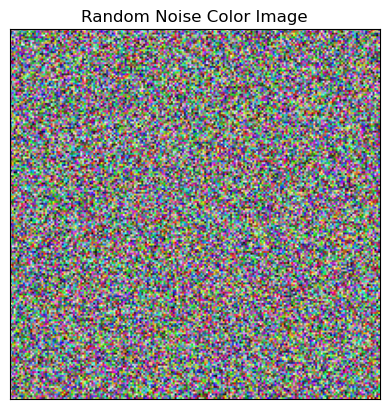

In [49]:
# Question 1 - Random Noise Color
noise_color_img = np.random.randint(0, high = 256, size = (200, 200, 3), dtype = np.uint8)

plt.imshow(noise_color_img)
plt.title("Random Noise Color Image")
plt.xticks([]), plt.yticks([])
plt.show()

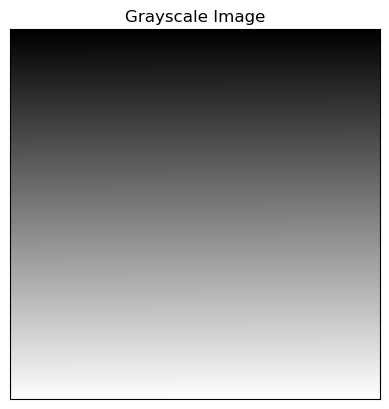

In [50]:
# Question 1 - Grayscale image

# np.linspace created an array of 200x200 spaces that ranges from 0 to 255 which can create gradient grayscale image
grayscale_img = np.linspace(0, 255, 200*200, dtype=np.uint8).reshape((200, 200)) 

plt.imshow(grayscale_img, cmap = plt.cm.gray)
plt.title("Grayscale Image")
plt.xticks([]), plt.yticks([])
plt.show()

In [53]:
# Question 2 - Divide an image into smaller patches using cropping

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    """ Cropping Grid
    Description:
    ---
    img is the source image
    num_horizontal_grid and num_vertical_grid are the number of patches along x and y axis
    line_color is the color of the grid line.

    Returns:
    ---
    Image With Grids """
    crop_img = cv.imread(img)
    if crop_img is None:
        raise Exception("No image found !")

    h, w, _ = crop_img.shape

    cell_width = w // num_horizontal_grid
    cell_height = h // num_vertical_grid

    # Draw the Vertical Grid Lines
    for i in range(1, num_horizontal_grid):
        x = i * cell_width # if w = 400 and num_h_g = 3 then cell_w = 133
        cv.line(crop_img, (x, 0), (x, h), line_color, 1)

    # Draw the Horizontal Grid Lines
    for i in range(1, num_vertical_grid):
        y = i * cell_height
        cv.line(crop_img, (0, y), (w, y), line_color, 1) 

    return crop_img

img_with_grid = crop_grid("images/dog.jfif", 3, 2, (255, 255, 255))

cv.imshow("Image with Grid", img_with_grid)
cv.waitKey(0)
cv.destroyAllWindows()

In [54]:
# Question 3
from utils import display_images

ori_img = cv.imread("images/dog.jfif")
brighter_img = ori_img.copy()

# Define constract and brightness
contrast = 1.2 # Contrast control ( 0 to 127)
brightness = 10. # Brightness control (0-100)

b_img = cv.addWeighted(brighter_img, contrast, brighter_img, 0, brightness)

display_images([ori_img, b_img], ("Original","Brighter"))